In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
#import viz # curriculum viz example code

#np.random.seed(123)

## Hypothesis Testing

Hypothesis testing is the process of comparing one hypothesis to another, and using statistics to help evaluate the hypothesis.


#### Null Hypothesis    
    The "default" hypothesis; usually no change, no effect, etc
    
#### Alternative Hypothesis
    There is a change, there is a difference
    
#### Significance Level, False Positive Rate


n general hypothesis tests are performed like so:

    1. Choose the right type of test for your data / question^[We won't get into it in this lesson, but the rest of this module will go in to detail on which kind of test is appropriate in different scenarios.]

    2. Set a desired confidence level and form hyoptheses

    3. Calculate the appropriate test statistics and p-value

    4. Conclude based on the above statistics

#### Central

In [28]:
# Each row is a student's 10 rolls
roll = np.random.choice([1, 2, 3, 4, 5, 6], (21, 10))
roll

array([[5, 6, 2, 5, 4, 6, 1, 6, 4, 3],
       [3, 6, 6, 4, 1, 3, 2, 1, 5, 2],
       [4, 2, 1, 4, 6, 1, 3, 6, 5, 3],
       [4, 6, 2, 6, 1, 4, 2, 2, 5, 3],
       [6, 3, 5, 5, 3, 2, 4, 5, 6, 6],
       [1, 3, 3, 2, 4, 1, 6, 2, 3, 3],
       [2, 1, 4, 4, 5, 1, 2, 5, 5, 6],
       [4, 4, 3, 6, 5, 5, 2, 5, 5, 3],
       [1, 5, 4, 3, 2, 2, 4, 1, 4, 5],
       [3, 4, 3, 6, 5, 6, 3, 5, 3, 6],
       [6, 1, 2, 2, 5, 3, 1, 2, 5, 6],
       [6, 2, 3, 3, 3, 1, 4, 6, 6, 4],
       [4, 5, 2, 6, 5, 3, 1, 6, 2, 2],
       [3, 3, 5, 6, 1, 2, 2, 5, 4, 3],
       [3, 3, 1, 5, 5, 6, 5, 5, 3, 2],
       [6, 1, 2, 3, 5, 6, 5, 2, 5, 4],
       [6, 3, 6, 5, 4, 6, 1, 6, 5, 5],
       [3, 1, 1, 3, 6, 4, 2, 4, 1, 3],
       [4, 3, 5, 6, 5, 4, 5, 2, 3, 1],
       [2, 1, 2, 6, 2, 5, 3, 6, 4, 1],
       [6, 6, 5, 2, 1, 2, 6, 5, 1, 4]])

(array([2., 1., 3., 4., 1., 5., 0., 2., 2., 1.]),
 array([2.8 , 2.99, 3.18, 3.37, 3.56, 3.75, 3.94, 4.13, 4.32, 4.51, 4.7 ]),
 <a list of 10 Patch objects>)

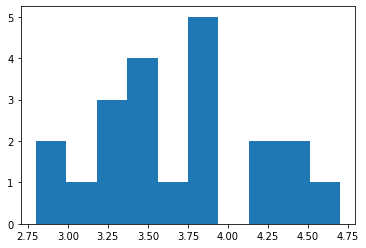

In [31]:
# The distribution of averages of rolling dice (uniform distribution) is a Normal Dist
roll.mean(axis=1)
avg_of_10_rolls = roll.mean(axis=1)

# A Sampline Distribution, the distribution of averages 
# (in this case the averages of each students'10 rolls)
plt.hist(avg_of_10_rolls)

This is useful because with this Sampling (Normal) Dist above can be used with cmd (cumulative density function)

T Score () A standardized way to talk about the difference between a calculated average and statistical average. (The average we observe and the statistical average)

-The T Score follows a Normal Distribution

#### Example

In [36]:
np.random.seed(7)
import math

#The smaller the n, the more likely to observe extreme values
n = 15

rolls = np.random.choice([1, 2, 3, 4, 5, 6], n)
rolls

array([5, 2, 4, 4, 5, 2, 1, 2, 3, 3, 1, 5, 1, 5, 1])

##### Set a 95% confidence level
-average dice rolls is 3.5

In [33]:
# Average roll
rolls.mean()

2.933333333333333

In [34]:
rolls.std()

1.569146972791976

In [38]:
# average dice roll is 3.5, t-score
t = (rolls.mean() - 3.5) / (rolls.std() / math.sqrt(n))
t

-1.3986520070493254

##### On a Normal Distribution
    + -1.39
    + 1.39

In [39]:
# Two tail T-test
##### The probabilty that we observe the value we have with the mean we have.#########
stats.t(n-1).cdf(t) * 2   # *2 for both the tail to the left and the tail to the right

# There's about a 20% chance that we got the result we got just due to chance.  
# We set a confidence level of 95%, so we would "fail to reject the Null Hypothesis", (Accept)
## In short, this means go with the alternative hypothesis which says that
## the mean is NOT 3.5

### This is the P value
### This is your percent of wrongness
### 20% chance that a student would roll a 3 or more extreme
### A p value of 1 means that the known population at 3.5 is definitely 3.5 or
###### your sample mean is exactly the same as your population mean

0.18367838344198753

In [ ]:
# If we fail to reject the Null Hypothesis, it means we believe our results are due to chance

##### p value
If P is less than alpha, we reject the Null Hypothesis
Alpha is 1 - confidence level (.95)     
    Alpha is .05



### Type I Error - False positive
-When we reject the null hypothesis, but in reality, the null hypothesis is true

###  Type II Error - False Negative
-When we fail to reject the null hypothesis when it is actually false

#### Another example - pull in salaries and depts in sql

In [ ]:
Null Hypothesis:

Alternative Hypothesis:

In [ ]:
avg_salary = salaries.salary.mean()
avg_research_salary = salaries[salaries.department == "Research"].salary.mean()

s = salaries[salaries.department == "Research"].salary.std()
n = salaries[salaries.department == "Research"].shape[0]

In [ ]:
## THIS...SAVES...TIME!!! 
# stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')
stats.ttest_1sample()

In [ ]:
research_salaries = salaries[salaries.department == "Research".salary]
marketing_salaries = salaries[salaries.department == "Marketing".salary]

In [ ]:
stats.ttest_ind(marketing_salaries, research_salaries)

#### Notes:
A T-Test let's us...
Let's us compare a continuous variable and a categorical variabe